## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

## Exercise 1 solution

In [26]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
from utils import display_images

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [2]:
#import necessary packages
from utils import *
import matplotlib.pyplot as plt

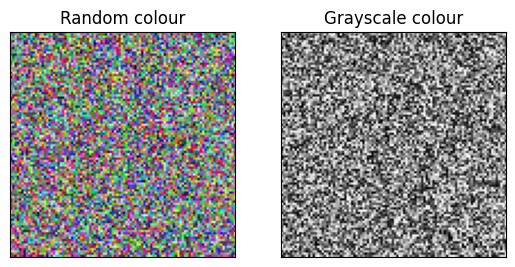

In [3]:
height = 100
width = 100

colour = np.random.randint(0, 256, size=(height, width, 3), dtype=np.uint8)
gray = np.random.randint(0, 256, (height, width), dtype=np.uint8)

plt.subplot(121)
plt.imshow(colour)
plt.title("Random colour")
plt.xticks([]), plt.yticks([]) 

plt.subplot(122)
plt.imshow(gray, cmap=plt.cm.gray)
plt.title("Grayscale colour")
plt.xticks([]), plt.yticks([]) 
plt.show()

## Exercise 2 solution

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    
    img = cv.imread(img)
    img_copy = img.copy()

    h, w = img.shape[:2]
    vertical = num_vertical_grid  
    horizontal = num_horizontal_grid 

    M = int(h / vertical)
    N = int(w / horizontal)

    tiles = []
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x + N
            y1 = y + M

            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)

            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)

            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)

            else:
                cv.rectangle(img_copy, (x,y), (x1,y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    display_image("crop", img_copy)

In [5]:
crop_grid("images/dog.jfif", 3, 3, (0,3,0))

## Exercise 3 solution
Methods :
1. Point operator
2. Neighborhood (area-based) operators (**but no source code was found online)
3. LAB color space
4. ......

I believe that there are many more methods

Formulas for (1) :
$$f(x) = \alpha f(x) + \beta$$
<p style="text-align:center">Can also be also expressed as :</p>
$$g(i,j)= \alpha \cdot f(i,)+ \beta$$

Reference : </br> 
[1] https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html

## Solution 1 : Point operator

In [6]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

## Point Operators : Enchance the contrast and brighten the image

In [7]:
gray = cv.imread('images/camera.jpg', 0)
transform = point_op(gray, 2, 0)

display_images([gray, transform], ("grayscale", "transform"))

## Point Operators : Lower the contrast and darken the image

In [8]:
transform2 = point_op(gray, 1, -50)

display_images([gray, transform2], ("grayscale", "darken"))

## Solution 2 : LAB color space with histogram equalization

In [6]:
#Reference :
#[1] https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
import cv2 as cv
img = cv.imread('images/car.jpg', 1)
# converting to LAB color space
lab= cv.cvtColor(img, cv.COLOR_BGR2LAB)
l_channel, a, b = cv.split(lab)

# Applying CLAHE to L-channel
clahe = cv.createCLAHE(clipLimit=8.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)
#the higher the clip limit, the higher the contrast


# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv.merge((cl,a,b))


# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
# result = np.hstack((img, enhanced_img))
cv.imshow('Enhanced', enhanced_img)
cv.imshow('Original',img)

cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
print("OpenCV version:", cv.__version__)

OpenCV version: 4.7.0


## Exercise 4 solution

1. RGB
   - the most use case is when we we want to use the opencv package
   - by right opencv uses BGR format, so when we use cv2.imread(), it is default in bgr format
   - then from bgr format, we convert it back to rgb format
   - the conversion between RGB and BGR is essential for image processing calculation purposes
2. HSV
   - used for enhancing light intensity in an image
   - a short form for Hue, Saturation and Value
   - more specific use cases would be, when we want to do color based segmentation
3. CIELAB
   - is used also a color space like the previous 2
   - it measures the difference between colors
   - it follows a standard which is the (International Commission of Illumination)

Reference : </br>
[1] https://medium.com/@bhuwankhatiwada57/color-difference-estimation-using-cie-l-a-b-color-space-b415f97a6b94

## RGB

In [10]:
#loading an RGB image
import cv2 as cv
rgb_image = cv.imread('images/car.jpg')
cv.imshow("rgb_image",rgb_image)

cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
#separate the channels
blue,green,red = cv.split(rgb_image)

cv.imshow('Red Channel',red)
cv.imshow('Green Channel',green)
cv.imshow('Blue Channel',blue)

cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
#merge three channels
bgr_img = cv.merge((blue,green,red))   #appears to be same as the original image
 
rgb_img = cv.merge((red, blue, green))  #we have reversed the channels

cv.imshow('BGR img',bgr_img)
cv.imshow('RGB img',rgb_img)

cv.waitKey(0)
cv.destroyAllWindows()

#the above code, proves my point that opencv reads in bgr format !

## HSV

In [30]:
#Reference : 
#[1] https://medium.com/@alakhsharmacs/enhancing-image-light-intensity-in-opencv-using-hsv-408fdd85d6d2

def increase_light_intensity(image_path,intensity_factor=1.5) :
    original_image = cv.imread(image_path)
    hsv_image = cv.cvtColor(original_image,cv.COLOR_BGR2HSV)
    value_channel =hsv_image[:,:,2]
    increased_value_channel = np.clip(value_channel*intensity_factor,0,255).astype(np.uint8)
    hsv_image[:,:,2] = increased_value_channel
    enhanced_image = cv.cvtColor(hsv_image,cv.COLOR_HSV2BGR)

    cv.imshow('Original Image', original_image)
    cv.imshow('Enhanced Image', enhanced_image)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [29]:
increase_light_intensity('images/car.jpg',intensity_factor=1.5)

## CIELAB

In [33]:
#short code snippet

from skimage.color import rgb2lab, deltaE_ciede2000
lab1 = (80, -100, 120)
lab2 = (150, 28, 116)

diff = deltaE_ciede2000(lab1, lab2)

print(diff)

#mainly to calculate the difference between 2 colors
#useful for color comparison tasks

59.48403809210314
